In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

data = pd.read_csv("t3.7.csv", sep=" ")
data = np.array(data)
# data = data.transpose()
# data

In [3]:
# 导入所需的库
import numpy as np
import statsmodels.api as sm

X = sm.add_constant(data[:,1:])
y = data[:, 0]
model = sm.OLS(y, X)
results = model.fit()
print("Model coefficients:", results.params)
print("Intercept:", results.params[0])
print("ANOVA table:")
print(results.summary())

Model coefficients: [ -0.97556779 104.31458983   0.40218991]
Intercept: -0.9755677935453377
ANOVA table:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     362.4
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           2.00e-13
Time:                        17:39:24   Log-Likelihood:                -89.942
No. Observations:                  18   AIC:                             185.9
Df Residuals:                      15   BIC:                             188.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

G:\github_project\github_me\regression_analysis_project\python_env\lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  k, _ = kurtosistest(a, axis)


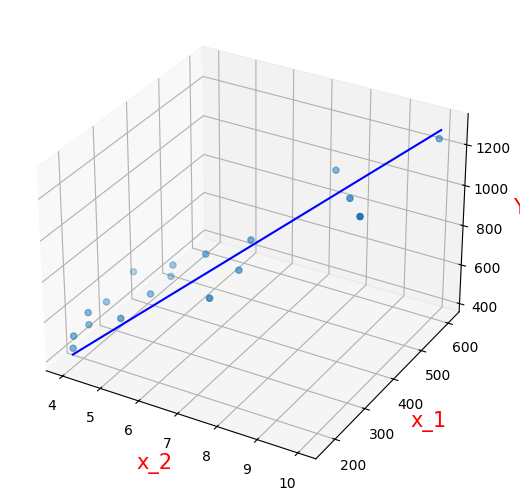

In [8]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
# 创建窗口
fig=plt.figure()
# 在该窗口中创建3d绘图对象
ax=Axes3D(fig)
fig.add_axes(ax)
ax.scatter(data[:,1], data[:,2], data[:,0])
x_1= [4, 10]
x_2 = [170, 610]
y = [results.params[0] + results.params[1] * 4 + results.params[2] * 10,
     results.params[0] + results.params[1] * 10 + results.params[2] * 610]

ax.plot(x_1, x_2, y, color='blue', linestyle='-')

# 添加坐标轴(顺序是Z, Y, X)
ax.set_zlabel('Y', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('x_1', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('x_2', fontdict={'size': 15, 'color': 'red'})

plt.show()


In [5]:
predictions = results.predict([[1, 10, 480]])
prediction = results.get_prediction([[1, 10, 480]])
print("Predictions:", predictions)
print("Prediction Interval:\n", prediction.summary_frame(alpha=0.05))

Predictions: [1235.22148494]
Prediction Interval:
           mean    mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  1235.221485  20.226788    1192.109107    1278.333862   1141.179524   

   obs_ci_upper  
0   1329.263446  
